In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

## Lets create this dataset where X is the number of cricket chirps and Y is the temperature in fahrenheit

In [2]:
X = [20, 16, 19.79999924, 18.39999962, 17.10000038, 15.5, 14.69999981, 17.10000038, 15.39999962, 16.20000076, 15, 17.20000076, 16, 17, 14.39999962]
Y = [88.59999847, 71.59999847, 93.30000305, 84.30000305, 80.59999847, 75.19999695, 69.69999695, 82, 69.40000153, 83.30000305, 79.59999847, 82.59999847, 80.59999847, 83.5, 76.30000305]

In [3]:
X = np.array(X)
Y = np.array(Y)

### Let us plot the figure to see this distribution

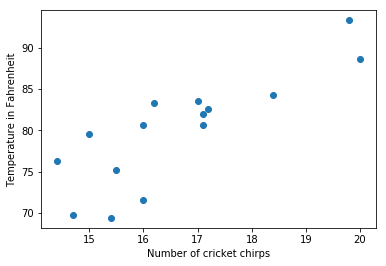

In [4]:
plt.scatter(X, Y)
plt.xlabel("Number of cricket chirps")
plt.ylabel("Temperature in Fahrenheit")
plt.show()

_Defining a function which returns the least square error_

$$Error = \sqrt (\sum (Y - Ypred)^{2} / n)$$

In [5]:
def error(x, y, m, c):
    numerator = 0
    denominator = 0
    for i in range(len(x)):
        numerator += (x[i] - np.mean(x)) * (y[i] - np.mean(y))
        denominator += (x[i] - np.mean(x)) ** 2
        
    return (numerator / denominator)

_The gradient of the errors with repect to error_

$$ dE/dm = -2/N*(Y_i - Ypred_i) $$
$$ dE/dc = -2/N*X_i*(Y_i - Ypred_i) $$

In [6]:
def gradient_descent(x, y, m, c):
    c_gradient = 0
    m_gradient = 0
    N = len(x)
    for i in range(0, len(x)):
        c_gradient += -(2/N) * (y[i] - (m * x[i] + c))
        m_gradient += -(2/N) * x[i] * (y[i] - (m * x[i] + c))
    return (m_gradient, c_gradient)

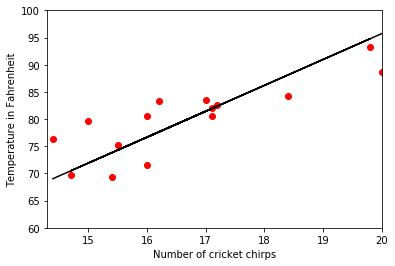

Error is 3.2910945679475647


None

In [18]:
m, c = 0.1, 0.1
lr = 0.001
epochs = 10

for i in range(epochs):
    m_gradient, c_gradient = gradient_descent(X, Y, m, c)
    # This is gradient descent
    m -= lr * m_gradient
    c -= lr * c_gradient

    #just for display purposes
    display.display(plt.scatter(X, Y, c = 'r'), plt.plot(X, X * m + c, c = 'k'))
    plt.ylim(60, 100)
    plt.xlim(14.3, 20)
    plt.xlabel("Number of cricket chirps")
    plt.ylabel("Temperature in Fahrenheit")
    display.clear_output(wait=True)
    plt.pause(0.5)

display.display(print("Error is", error(X, Y, m, c)))

# Here I recommend to give lr a big value and see the line jjst bouncing around, or giving lr a small value and looking at it just not training
# Also try giving the inital m and c some very large value and we caan see it is very hard for it to converge.
# Basically set your learning rate right and initialization parameters small, something we can take away to training neural nets.